# PROYECTO FINAL DATA ANALYST

# ÍNDICE

1. Estructura de los datos  
   1.1 Origen de los datos  
   1.2 Importación de librerías e instalaciones  
   1.3 Visualización y modificación de valores nulos  
   1.4 Añadir columnas  
       1.4.1 Longitud y Latitud  
       1.4.2 Provincia  
       1.4.3 Columna ID  

2. Introducción: Contextualización de la Criminalidad en Cataluña

   2.1 Hipótesis Principal  
   2.2 Gráfico 1: Distribución de los 10 tipos de delitos más comunes en Cataluña (2019-2023)  
   2.3 Gráfico 2: Evolución de los Delitos Conocidos en Cataluña por Año (2019-2023)  
       2.3.1 Test ANOVA  

3. Análisis: Influencia del COVID-19 en los delitos sexuales

   3.1 Hipótesis Secundaria  
   3.2 Gráfico 3: Distribución de delitos sexuales por periodo  
       3.2.1 Test ANOVA: Análisis de Varianza  
       3.2.2 Test Post-Hoc Tukey  
   3.3 Gráfico 4: Total de Delitos Conocidos por Provincia en Cataluña (2019-2021)  
   3.4 Gráfico 5: Evolución de los Delitos Sexuales Conocidos en Cataluña (2019-2021)  
   3.5 Gráfico 6: Distribución de los Delitos Sexuales por Tipo (2019-2021)  
   3.6 Gráfico 7: Evolución de los Delitos Sexuales en Barcelona y Girona (2019-2021)  
   3.7 Gráfico 8: Mapa de Calor de puntos sobre los Delitos Sexuales de 2019 a 2021 en Barcelona y Girona
   
4. Creación de Dashboard en PBI

5. Conclusiones: Reflexiones Finales sobre la Criminalidad y Delitos Sexuales en Cataluña


# 1. ESTRUCTURA DE LOS DATOS

# 1.1 Origen de los datos

Los datos utilizados en este proyecto han sido obtenidos de la plataforma 'Dades Obertas de Catalunya', disponible en el siguiente enlace: https://analisi.transparenciacatalunya.cat/Seguretat/Fets-penals-coneguts-fets-coneguts-resolts-i-deten/qnyt-emjc/about_data."


# 1.2 Importación de librerías e instalaciones

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ruta = r"C:\Users\crist\Downloads\Fets_penals_coneguts__fets_coneguts_resolts_i_detencions.csv"
df = pd.read_csv(ruta)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281845 entries, 0 to 281844
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Mes                         281845 non-null  int64 
 1   Nom mes                     281845 non-null  object
 2   Any                         281845 non-null  int64 
 3   Regió Policial (RP)         281845 non-null  object
 4   Àrea Bàsica Policial (ABP)  281845 non-null  object
 5   Títol Codi Penal            281838 non-null  object
 6   Tipus de fet                281838 non-null  object
 7   Coneguts                    281845 non-null  int64 
 8   Resolts                     281845 non-null  int64 
 9   Detencions                  281845 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 21.5+ MB


In [3]:
df.head()

,Mes,Nom mes,Any,Regió Policial (RP),Àrea Bàsica Policial (ABP),Títol Codi Penal,Tipus de fet,Coneguts,Resolts,Detencions
0,1,gener,2011,RP Central,ABP Osona,De les falsedats,Falsedats documentals,3,2,1
1,1,gener,2011,RP Central,ABP Osona,De les lesions,Lesions,4,5,1
2,1,gener,2011,RP Central,ABP Osona,De les tortures i altres delictes contra la in...,Tracte degradant / vexatori,11,13,6
3,1,gener,2011,RP Central,ABP Osona,Delictes contra el patrimoni i contra l’ordre ...,Apropiació indeguda,2,2,0
4,1,gener,2011,RP Central,ABP Osona,Delictes contra el patrimoni i contra l’ordre ...,Danys,7,1,0


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


# 1.3 Visualización y modificación de valores nulos

In [8]:
print(df.isnull().sum())

Mes                           0
Nom mes                       0
Any                           0
Regió Policial (RP)           0
Àrea Bàsica Policial (ABP)    0
Títol Codi Penal              7
Tipus de fet                  7
Coneguts                      0
Resolts                       0
Detencions                    0
dtype: int64


In [9]:
# Reemplazar valores nulos en las columnas específicas por "Desconocido"
df['Títol Codi Penal'] = df['Títol Codi Penal'].fillna('desconegut')
df['Tipus de fet'] = df['Tipus de fet'].fillna('desconegut')

print(df.isnull().sum())

Mes                           0
Nom mes                       0
Any                           0
Regió Policial (RP)           0
Àrea Bàsica Policial (ABP)    0
Títol Codi Penal              0
Tipus de fet                  0
Coneguts                      0
Resolts                       0
Detencions                    0
dtype: int64


# 1.4 Añadir columnas 

## 1.4.1 Latitud y Longitud

In [10]:
# Diccionario con las coordenadas de todas las áreas
coordenadas_dict = {
    # Camp de Tarragona
    "ABP Tarragonès": (41.1172364, 1.2546057),
    "ABP Baix Camp - Priorat": (41.14425385, 1.0355429734624835),
    "ABP Baix Penedès": (41.27905495, 1.53031672606579),
    "ABP Alt Camp - C. de Barberà": (41.33978485, 1.3254671566517102),
    
    # Terres de l'Ebre
    "ABP Baix Ebre": (40.8544324, 0.5508152823551558),
    "ABP Montsià": (40.6525574, 0.5270277467447398),
    "ABP Terra Alta - Ribera d'Ebre": (41.08491015, 0.6349445),
    
    # Barcelona (RP Metropolitana)
    "ABP Eixample": (41.3936885, 2.1636552),
    "ABP Ciutat Vella": (41.3819793, 2.1804154),
    "ABP Sants-Montjuïc": (41.3694609, 2.1441845),
    "ABP Sant Martí": (41.4084102, 2.2031889),
    "ABP Nou Barris": (41.4458153, 2.1798006),
    "ABP Sant Andreu": (41.4372495, 2.1954872),
    "ABP Horta-Guinardó": (41.4289652, 2.1506189),
    "ABP Sarrià-Sant Gervasi": (41.4016165, 2.1298571),
    "ABP Gràcia": (41.4065767, 2.1582812),
    "ABP Les Corts": (41.385244, 2.1328626),
    "ABP Barcelona": (41.3828939, 2.1774322),
    
    # Metropolitana Sud
    "ABP l'Hospitalet de Llobregat": (41.3598601, 2.0997927),
    "ABP Garraf": (41.26104615, 1.8045440418120768),
    "ABP Gavà": (41.3050933, 2.0063126),
    "ABP Sant Feliu de Llobregat": (41.3812851, 2.0446381),
    "ABP Martorell": (41.4769177, 1.9283971),
    "ABP Alt Penedès": (41.3683955, 1.7293825812105397),
    "ABP Cornellà de Llobregat": (41.355724, 2.0706225),
    "ABP el Prat de Llobregat": (41.3246333, 2.0952568),
    "ABP Sant Boi de Llobregat": (41.3459033, 2.0413673),
    "ABP Esplugues de Llobregat": (41.3776796, 2.0899722),
    
    # Metropolitana Nord
    "ABP Granollers": (41.6079555, 2.2876008),
    "ABP Badalona": (41.4493539, 2.248254),
    "ABP Sabadell": (41.5421013, 2.1138977),
    "ABP Terrassa": (41.5629623, 2.0100492),
    "ABP Arenys de Mar": (41.5797031, 2.5491562),
    "ABP Cerdanyola": (41.4910324, 2.1374969),
    "ABP Rubí": (41.4936194, 2.0319476),
    "ABP Mataró": (41.5398348, 2.4448926),
    "ABP Santa Coloma de Gramenet": (41.4515626, 2.2083371),
    "ABP Mollet del Vallès": (41.5393484, 2.2130934),
    "ABP Premià de Mar": (41.4926822, 2.3605846),
    
    # RP Central
    "ABP Bages": (41.77933405, 1.761740585224267),
    "ABP Osona": (41.95172325, 2.2872505105624485),
    "ABP Anoia": (41.61498975, 1.5745883086495573),
    "ABP Berguedà": (42.1105715, 1.8583411256297329),
    "ABP Solsonès": (41.4075123, 2.1322359),

    # Coordenadas RP Pirineu Occidental
    "ABP Alt Urgell": (42.2416367, 1.3917662502816497),
    "ABP Cerdanya": (42.39140695, 1.804519104958254),
    "ABP Vall d'Aran - Alta Ribagorça": (42.72560575, 0.8503525141018816),
    "ABP Pallars Jussà - Pallars Sobirà": (42.521666666667, 1.1883333333333),
    
    # Coordenadas RP Ponent
    "ABP Segrià": (41.6147605, 0.6267842),
    "ABP Pla d'Urgell": (41.644444, 0.912778),
    "ABP Segarra - Urgell": (41.662222222222, 1.0858333333333),
    "ABP Segrià - Garrigues - Pla d'Urgell": (41.739166666667, 1.3319444444444),
    "ABP Noguera": (41.9042729, 0.9451662944843479),
    "ABP Garrigues - Pla d'Urgell": (41.44014875, 0.8347829049438844),
    
    # RP Girona
    "ABP Gironès - Pla de l'Estany": (42.12190995, 2.7806888016293154),
    "ABP Alt Empordà - Figueres": (42.2666314, 2.9638434),
    "ABP Selva Interior": (41.85471935, 2.62670178282172),
    "ABP Selva Litoral": (41.85471935, 2.62670178282172),
    "ABP Baix Empordà - La Bisbal": (41.9465681, 3.085898776518),
    "ABP Alt Empordà - Roses": (42.2632018, 3.1755328),
    "ABP Garrotxa": (42.171388888889, 2.5547222222222),
    "ABP Ripollès": (42.271111111111, 2.2552777777778),
    "ABP Baix Empordà - Sant Feliu": (41.7838827, 3.0283195)
}
def obtener_coordenadas(area):
    return coordenadas_dict.get(area, (None, None))  # Devuelve (None, None) si no encuentra el área

# Añadir las columnas 
df[['Latitud', 'Longitud']] = df['Àrea Bàsica Policial (ABP)'].apply(obtener_coordenadas).apply(pd.Series)
print(df.head())  # Verifica las primeras filas del DataFrame actualizado

   Mes Nom mes   Any Regió Policial (RP) Àrea Bàsica Policial (ABP)  \
0    1   gener  2011          RP Central                  ABP Osona   
1    1   gener  2011          RP Central                  ABP Osona   
2    1   gener  2011          RP Central                  ABP Osona   
3    1   gener  2011          RP Central                  ABP Osona   
4    1   gener  2011          RP Central                  ABP Osona   

                                    Títol Codi Penal  \
0                                   De les falsedats   
1                                     De les lesions   
2  De les tortures i altres delictes contra la in...   
3  Delictes contra el patrimoni i contra l’ordre ...   
4  Delictes contra el patrimoni i contra l’ordre ...   

                  Tipus de fet  Coneguts  Resolts  Detencions    Latitud  \
0        Falsedats documentals         3        2           1  41.951723   
1                      Lesions         4        5           1  41.951723   
2  Tract

In [11]:
# Verificar si hay valores NaN '
nan_values = df[['Latitud', 'Longitud']].isna().sum()
print(nan_values)

Latitud     0
Longitud    0
dtype: int64


## 1.4.2 Provincia

In [12]:
# Mapeo entre las Regiones Policiales (RP) y las provincias
mapeo_provincias = {
    'RP Central': 'Barcelona',
    'RP Metropolitana Barcelona': 'Barcelona',
    'RP Metropolitana Sud': 'Barcelona',
    'RP  Metropolitana Nord': 'Barcelona',  # Corrección aplicada
    'RP Terres de l\'Ebre': 'Tarragona',
    'RP Camp de Tarragona': 'Tarragona',
    'RP Girona': 'Girona',
    'RP Pirineu Occidental': 'Lleida',
    'RP Ponent': 'Lleida'
}

# Aplicar el mapeo a la columna 'Provincia'
df['Provincia'] = df['Regió Policial (RP)'].map(mapeo_provincias)

# Verificar si ahora hay valores nulos en la columna 'Provincia'
print(df[df['Provincia'].isnull()])


Empty DataFrame
Columns: [Mes, Nom mes, Any, Regió Policial (RP), Àrea Bàsica Policial (ABP), Títol Codi Penal, Tipus de fet, Coneguts, Resolts, Detencions, Latitud, Longitud, Provincia]
Index: []


In [13]:
df.columns

Index(['Mes', 'Nom mes', 'Any', 'Regió Policial (RP)',
       'Àrea Bàsica Policial (ABP)', 'Títol Codi Penal', 'Tipus de fet',
       'Coneguts', 'Resolts', 'Detencions', 'Latitud', 'Longitud',
       'Provincia'],
      dtype='object')

## 1.4.3 Columna ID

In [14]:
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

df.insert(0, "ID", range(1, len(df) + 1))
print(df.head())

   ID  Mes Nom mes   Any Regió Policial (RP) Àrea Bàsica Policial (ABP)  \
0   1    1   gener  2011          RP Central                  ABP Osona   
1   2    1   gener  2011          RP Central                  ABP Osona   
2   3    1   gener  2011          RP Central                  ABP Osona   
3   4    1   gener  2011          RP Central                  ABP Osona   
4   5    1   gener  2011          RP Central                  ABP Osona   

                                    Títol Codi Penal  \
0                                   De les falsedats   
1                                     De les lesions   
2  De les tortures i altres delictes contra la in...   
3  Delictes contra el patrimoni i contra l’ordre ...   
4  Delictes contra el patrimoni i contra l’ordre ...   

                  Tipus de fet  Coneguts  Resolts  Detencions    Latitud  \
0        Falsedats documentals         3        2           1  41.951723   
1                      Lesions         4        5           

In [15]:
df.head()

,ID,Mes,Nom mes,Any,Regió Policial (RP),Àrea Bàsica Policial (ABP),Títol Codi Penal,Tipus de fet,Coneguts,Resolts,Detencions,Latitud,Longitud,Provincia
0,1,1,gener,2011,RP Central,ABP Osona,De les falsedats,Falsedats documentals,3,2,1,41.951723,2.287251,Barcelona
1,2,1,gener,2011,RP Central,ABP Osona,De les lesions,Lesions,4,5,1,41.951723,2.287251,Barcelona
2,3,1,gener,2011,RP Central,ABP Osona,De les tortures i altres delictes contra la in...,Tracte degradant / vexatori,11,13,6,41.951723,2.287251,Barcelona
3,4,1,gener,2011,RP Central,ABP Osona,Delictes contra el patrimoni i contra l’ordre ...,Apropiació indeguda,2,2,0,41.951723,2.287251,Barcelona
4,5,1,gener,2011,RP Central,ABP Osona,Delictes contra el patrimoni i contra l’ordre ...,Danys,7,1,0,41.951723,2.287251,Barcelona


# 2. Introducción: Contextualización de la Criminalidad en Cataluña

La criminalidad en Cataluña ha experimentado variaciones en los últimos años. A lo largo de este análisis, exploraremos los delitos sexuales y cómo se comparan con otras categorías de delitos. Iniciaremos con una visión global de la criminalidad en Cataluña, para luego centrarnos en la evolución de los delitos contra la libertad y la indemnidad sexual y analizar su comportamiento en las provincias de Barcelona y Girona.

# 2.1 Hipótesis Principal:
Ha aumentado la criminalidad en Cataluña en los últimos 5 años.

Este análisis examinará cómo han evolucionado los delitos sexuales (y otros tipos de delitos) en el período de 2019 a 2023, para validar o refutar esta hipótesis.

## 2.2 Gráfico 1: Distribución de los 10 tipos de delitos más comunes en Cataluña (2019-2023). 
Tipo de gráfico: Gráfico de pastel. Este gráfico ilustra cómo se distribuyen los 10 tipos de delitos más frecuentes en Cataluña. Los delitos sexuales son parte de la criminalidad, pero se comparan con delitos como los robos, violencia doméstica y delitos socioeconómicos.

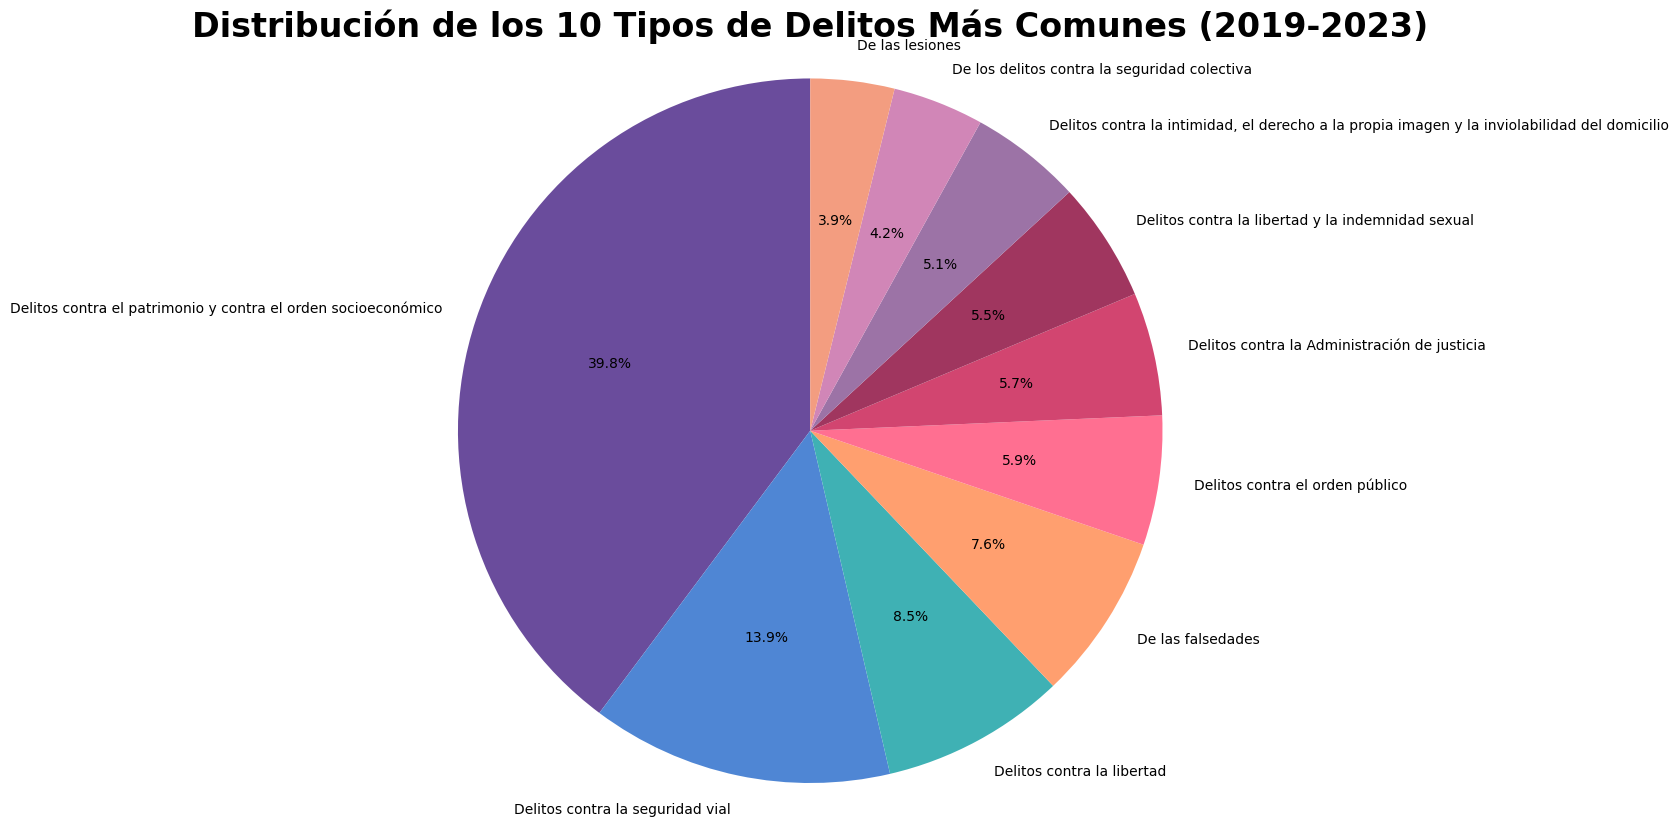

In [16]:
import matplotlib.pyplot as plt

colores_eclosion = [
    '#6A4C9C',  # Morado claro
    '#4F86D4',  # Azul
    '#3FB1B4',  # Verde azulado
    '#FF9F6F',  # Naranja claro
    '#FF6F91',  # Rosa
    '#D24570',  # Rojo intenso
    '#A0365F',  # Rojo oscuro
    '#9C73A6',  # Lavanda
    '#D186B7',  # Rosa claro
    '#F39D80'   # Amarillo/Beige
]

filtro_años = df[df['Any'].between(2019, 2023)]
titulo_lista = filtro_años['Títol Codi Penal'].value_counts().head(10)

titulo_lista.index = [x.replace(
    'De les falsedats', 'De las falsedades')
    .replace('De les lesions', 'De las lesiones')
    .replace('De les tortures i altres delictes contra la integritat moral', 'De las torturas y otros delitos contra la integridad moral')
    .replace('Delictes contra el patrimoni i contra l’ordre socioeconòmic', 'Delitos contra el patrimonio y contra el orden socioeconómico')
    .replace("Delictes contra l'Administració de justícia", 'Delitos contra la Administración de justicia')
    .replace('Delictes contra la llibertat i la indemnitat sexuals', 'Delitos contra la libertad y la indemnidad sexual')
    .replace("Delictes contra l'ordre públic", 'Delitos contra el orden público')
    .replace('Delictes contra la intimitat, el dret a la pròpia imatge i la inviolabilitat del domicili', 'Delitos contra la intimidad, el derecho a la propia imagen y la inviolabilidad del domicilio')
    .replace('Delictes contra la llibertat', 'Delitos contra la libertad')
    .replace('Delictes contra la seguretat viària', 'Delitos contra la seguridad vial')
    .replace('Dels delictes contra la seguretat col·lectiva', 'De los delitos contra la seguridad colectiva')
    .replace('Delictes contra els drets dels ciutadans estrangers', 'Delitos contra los derechos de los ciudadanos extranjeros')
    .replace('De l’homicidi i les seves formes', 'Del homicidio y sus formas')
    .replace('Delictes contra l’honor', 'Delitos contra el honor')
    .replace('Delictes contra les relacions familiars', 'Delitos contra las relaciones familiares')
    .replace("Delictes contra l'Administració pública", 'Delitos contra la Administración pública')
    .replace('Dels delictes contra els drets dels treballadors', 'De los delitos contra los derechos de los trabajadores')
    .replace('Dels delictes relatius a l’ordenació del territori i l’urbanisme, la protecció del patrimoni històric i el medi ambient', 'De los delitos relativos a la ordenación del territorio y el urbanismo, la protección del patrimonio histórico y el medio ambiente')
    .replace('Delictes contra la Constitució', 'Delitos contra la Constitución')
    .replace('Del tràfic d’éssers humans', 'Del tráfico de seres humanos')
    .replace('Faltes contra el patrimoni', 'Faltas contra el patrimonio')
    .replace('De l’omissió del deure d’auxili', 'De la omisión del deber de auxilio')
    .replace('Dels delictes contra la hisenda pública i contra la Seguretat Social', 'De los delitos contra la hacienda pública y contra la Seguridad Social')
    .replace('De les lesions al fetus', 'De las lesiones al feto')
    .replace('De l’avortament', 'Del aborto')
    .replace('Delictes contra la comunitat internacional', 'Delitos contra la comunidad internacional')
    .replace('Faltes contra les persones', 'Faltas contra las personas')
    .replace('desconegut', 'Desconocido')
    .replace('Faltes contra els interessos generals', 'Faltas contra los intereses generales')
    for x in titulo_lista.index]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 10))
plt.pie(titulo_lista, labels=titulo_lista.index, autopct='%1.1f%%', startangle=90, colors=colores_eclosion)
# Título con mayor tamaño de fuente
plt.title('Distribución de los 10 Tipos de Delitos Más Comunes (2019-2023)', fontsize=24, weight='bold')  # Aumento de tamaño
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo perfecto
plt.show()


Interpretación: Gran parte de los delitos, un 39,8 %, corresponden a delitos contra el patrimonio, que incluyen hurtos, robos con fuerza, robos de vehículos, estafas u ocupaciones, entre otros. Les siguen los delitos contra la seguridad vial, con un 13,9 %, como conducir bajo la influencia de drogas o alcohol o negarse a someterse a pruebas legales de comprobación. Los delitos contra la libertad representan un 8,5 %, entre ellos amenazas, coacciones y secuestros.

Los delitos de falsedad, con un 7,6 %, abarcan usurpación del estado civil, falsedad documental y falsificación de moneda, entre otros. Los delitos contra el orden público constituyen un 5,9 % e incluyen atentados contra la autoridad, desórdenes públicos, resistencia y desobediencia. Por otro lado, los delitos contra la administración de justicia, un 5,7 %, incluyen encubrimiento y prevaricación.

En cuanto a los delitos contra la libertad sexual, con un 5,5 %, estos abarcan acoso, agresiones y exhibicionismo. Los delitos contra la intimidad representan un 5,1 % e incluyen descubrimiento y revelación de secretos. Con un 4,2 %, encontramos los delitos contra la seguridad colectiva, como la liberación de energía nuclear o elementos radiactivos o la alteración de instalaciones nucleares o radioeléctricas. Finalmente, los delitos de lesiones, como agresiones físicas o mutilaciones, constituyen un 3,9 %.

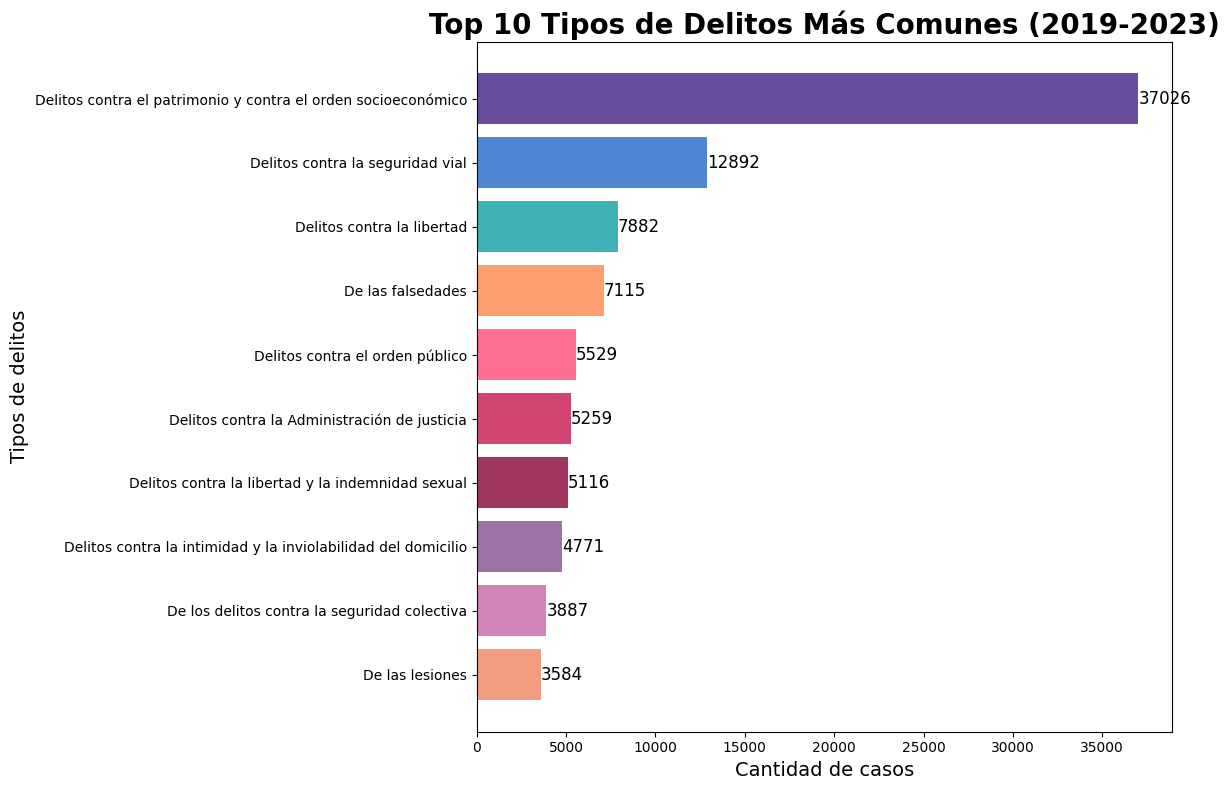

In [17]:
import matplotlib.pyplot as plt

# Aplicar los filtros a los datos
filtro_años = df[df['Any'].between(2019, 2023)]
titulo_lista = filtro_años['Títol Codi Penal'].value_counts().head(10)

# Reemplazar los nombres largos por versiones simplificadas y traducidas
titulo_lista.index = [x.replace(
    'De les falsedats', 'De las falsedades')
    .replace('De les lesions', 'De las lesiones')
    .replace('De les tortures i altres delictes contra la integritat moral', 'De las torturas y otros delitos contra la integridad moral')
    .replace('Delictes contra el patrimoni i contra l’ordre socioeconòmic', 'Delitos contra el patrimonio y contra el orden socioeconómico')
    .replace("Delictes contra l'Administració de justícia", 'Delitos contra la Administración de justicia')
    .replace('Delictes contra la llibertat i la indemnitat sexuals', 'Delitos contra la libertad y la indemnidad sexual')
    .replace("Delictes contra l'ordre públic", 'Delitos contra el orden público')
    .replace('Delictes contra la intimitat, el dret a la pròpia imatge i la inviolabilitat del domicili', 'Delitos contra la intimidad y la inviolabilidad del domicilio')
    .replace('Delictes contra la llibertat', 'Delitos contra la libertad')
    .replace('Delictes contra la seguretat viària', 'Delitos contra la seguridad vial')
    .replace('Dels delictes contra la seguretat col·lectiva', 'De los delitos contra la seguridad colectiva')
    .replace('Delictes contra els drets dels ciutadans estrangers', 'Delitos contra los derechos de los ciudadanos extranjeros')
    .replace('De l’homicidi i les seves formes', 'Del homicidio y sus formas')
    .replace('Delictes contra l’honor', 'Delitos contra el honor')
    .replace('Delictes contra les relacions familiars', 'Delitos contra las relaciones familiares')
    .replace("Delictes contra l'Administració pública", 'Delitos contra la Administración pública')
    .replace('Dels delictes contra els drets dels treballadors', 'De los delitos contra los derechos de los trabajadores')
    .replace('Dels delictes relatius a l’ordenació del territori i l’urbanisme, la protecció del patrimoni històric i el medi ambient', 'De los delitos contra la ordenación del territorio y el medio ambiente')
    .replace('Delictes contra la Constitució', 'Delitos contra la Constitución')
    .replace('Del tràfic d’éssers humans', 'Del tráfico de seres humanos')
    .replace('Faltes contra el patrimoni', 'Faltas contra el patrimonio')
    .replace('De l’omissió del deure d’auxili', 'De la omisión del deber de auxilio')
    .replace('Dels delictes contra la hisenda pública i contra la Seguretat Social', 'De los delitos contra la hacienda pública y la Seguridad Social')
    .replace('De les lesions al fetus', 'De las lesiones al feto')
    .replace('De l’avortament', 'Del aborto')
    .replace('Delictes contra la comunitat internacional', 'Delitos contra la comunidad internacional')
    .replace('Faltes contra les persones', 'Faltas contra las personas')
    .replace('desconegut', 'Desconocido')
    .replace('Faltes contra els interessos generals', 'Faltas contra los intereses generales')
    for x in titulo_lista.index]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barras = plt.barh(titulo_lista.index, titulo_lista.values, color=colores_eclosion[:len(titulo_lista)])

# Agregar etiquetas y título
plt.xlabel('Cantidad de casos', fontsize=14)
plt.ylabel('Tipos de delitos', fontsize=14)
plt.title('Top 10 Tipos de Delitos Más Comunes (2019-2023)', fontsize=20, weight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el más frecuente esté arriba

# Agregar etiquetas de valor en las barras
for barra in barras:
    plt.text(barra.get_width() + 0.5, barra.get_y() + barra.get_height() / 2, 
             f'{int(barra.get_width())}', va='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


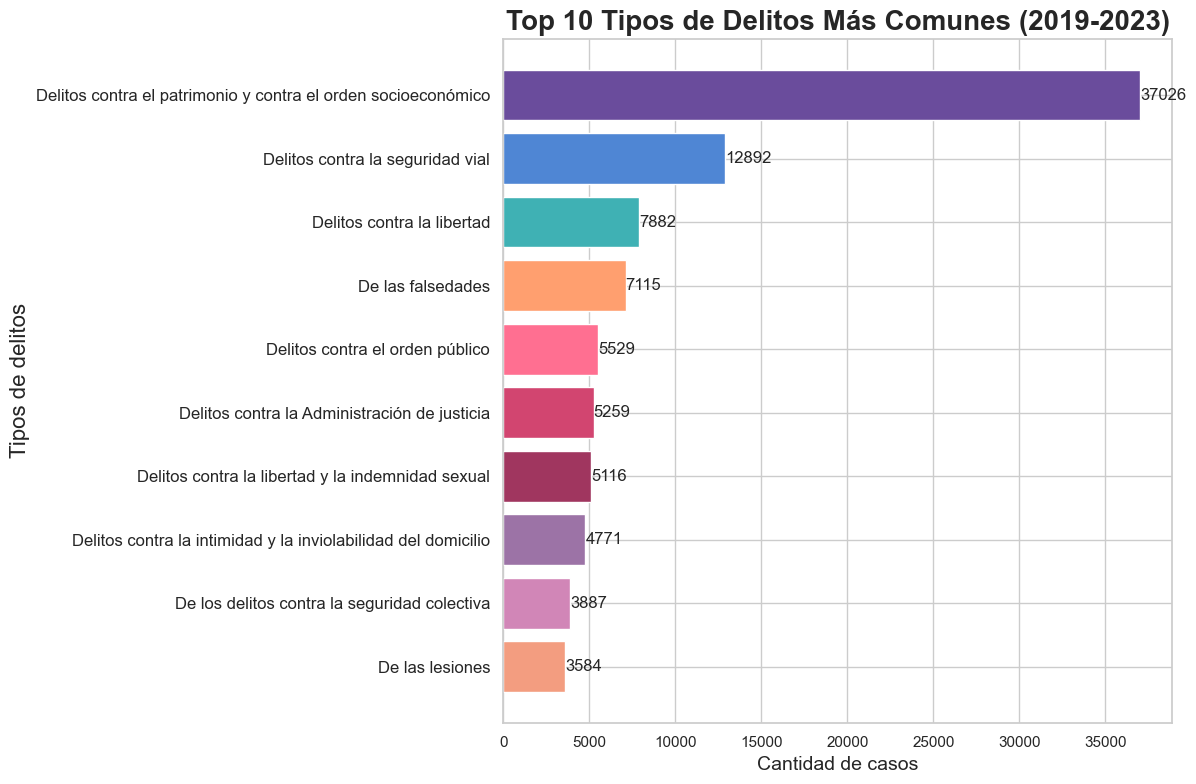

In [33]:
import matplotlib.pyplot as plt

# Aplicar los filtros a los datos
filtro_años = df[df['Any'].between(2019, 2023)]
titulo_lista = filtro_años['Títol Codi Penal'].value_counts().head(10)

# Reemplazar los nombres largos por versiones simplificadas y traducidas
titulo_lista.index = [x.replace(
    'De les falsedats', 'De las falsedades')
    .replace('De les lesions', 'De las lesiones')
    .replace('De les tortures i altres delictes contra la integritat moral', 'De las torturas y otros delitos contra la integridad moral')
    .replace('Delictes contra el patrimoni i contra l’ordre socioeconòmic', 'Delitos contra el patrimonio y contra el orden socioeconómico')
    .replace("Delictes contra l'Administració de justícia", 'Delitos contra la Administración de justicia')
    .replace('Delictes contra la llibertat i la indemnitat sexuals', 'Delitos contra la libertad y la indemnidad sexual')
    .replace("Delictes contra l'ordre públic", 'Delitos contra el orden público')
    .replace('Delictes contra la intimitat, el dret a la pròpia imatge i la inviolabilitat del domicili', 'Delitos contra la intimidad y la inviolabilidad del domicilio')
    .replace('Delictes contra la llibertat', 'Delitos contra la libertad')
    .replace('Delictes contra la seguretat viària', 'Delitos contra la seguridad vial')
    .replace('Dels delictes contra la seguretat col·lectiva', 'De los delitos contra la seguridad colectiva')
    .replace('Delictes contra els drets dels ciutadans estrangers', 'Delitos contra los derechos de los ciudadanos extranjeros')
    .replace('De l’homicidi i les seves formes', 'Del homicidio y sus formas')
    .replace('Delictes contra l’honor', 'Delitos contra el honor')
    .replace('Delictes contra les relacions familiars', 'Delitos contra las relaciones familiares')
    .replace("Delictes contra l'Administració pública", 'Delitos contra la Administración pública')
    .replace('Dels delictes contra els drets dels treballadors', 'De los delitos contra los derechos de los trabajadores')
    .replace('Dels delictes relatius a l’ordenació del territori i l’urbanisme, la protecció del patrimoni històric i el medi ambient', 'De los delitos contra la ordenación del territorio y el medio ambiente')
    .replace('Delictes contra la Constitució', 'Delitos contra la Constitución')
    .replace('Del tràfic d’éssers humans', 'Del tráfico de seres humanos')
    .replace('Faltes contra el patrimoni', 'Faltas contra el patrimonio')
    .replace('De l’omissió del deure d’auxili', 'De la omisión del deber de auxilio')
    .replace('Dels delictes contra la hisenda pública i contra la Seguretat Social', 'De los delitos contra la hacienda pública y la Seguridad Social')
    .replace('De les lesions al fetus', 'De las lesiones al feto')
    .replace('De l’avortament', 'Del aborto')
    .replace('Delictes contra la comunitat internacional', 'Delitos contra la comunidad internacional')
    .replace('Faltes contra les persones', 'Faltas contra las personas')
    .replace('desconegut', 'Desconocido')
    .replace('Faltes contra els interessos generals', 'Faltas contra los intereses generales')
    for x in titulo_lista.index]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barras = plt.barh(titulo_lista.index, titulo_lista.values, color=colores_eclosion[:len(titulo_lista)])

# Agregar etiquetas y título
plt.xlabel('Cantidad de casos', fontsize=14)
plt.ylabel('Tipos de delitos', fontsize=16)
plt.title('Top 10 Tipos de Delitos Más Comunes (2019-2023)', fontsize=20, weight='bold')
plt.gca().invert_yaxis()  # Invertir el eje y para que el más frecuente esté arriba

# Ajustar tamaño de las etiquetas del eje Y
plt.yticks(fontsize=12)

# Agregar etiquetas de valor en las barras
for barra in barras:
    plt.text(barra.get_width() + 0.5, barra.get_y() + barra.get_height() / 2, 
             f'{int(barra.get_width())}', va='center', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## 2.3 Gráfico 2: Evolución de los Delitos Conocidos en Cataluña por Año (2019-2023)
Tipo de gráfico: Gráfico de líneas

C:\Users\crist\AppData\Local\Temp\ipykernel_26952\3920221037.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


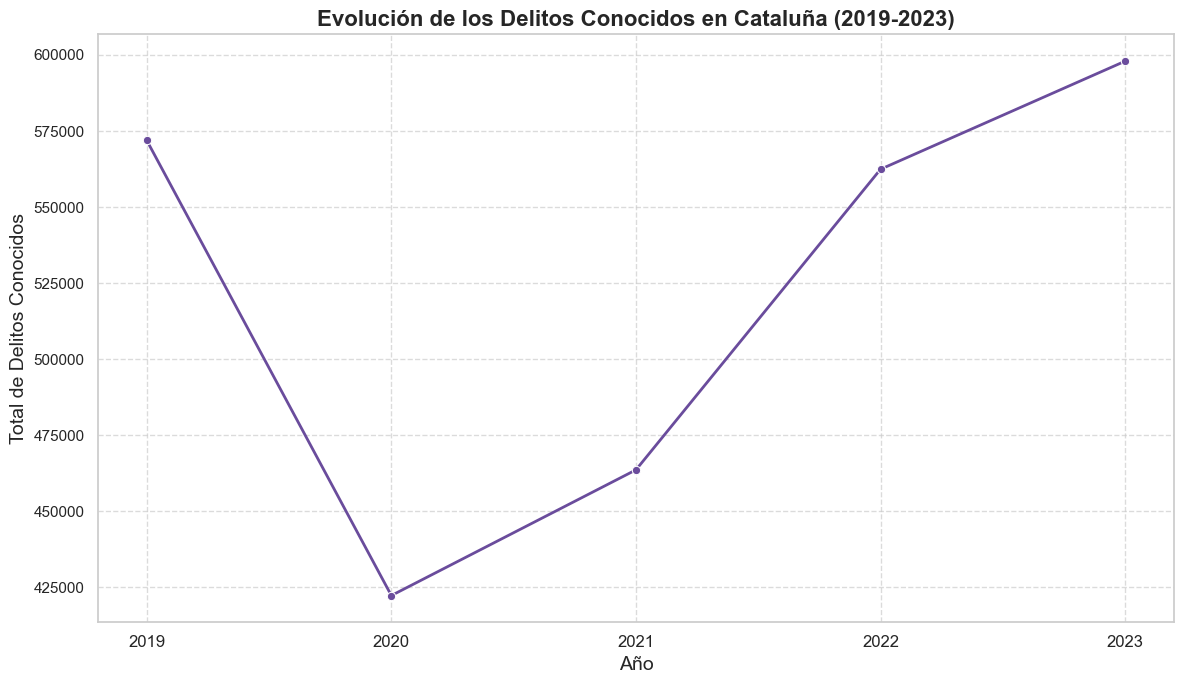

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", palette="muted")
filtro_años = df[df['Any'].between(2019, 2023)]
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=filtro_años, 
    x='Any', 
    y='Coneguts', 
    estimator='sum', 
    ci=None, 
    marker='o', 
    linewidth=2,
    color='#6A4C9C'  
)

plt.title('Evolución de los Delitos Conocidos en Cataluña (2019-2023)', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total de Delitos Conocidos', fontsize=14)
plt.xticks(range(2019, 2024), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Interpretación: Se observa claramente una caída significativa en los datos durante 2020 (pandemia), pasando de casi 575,000 delitos conocidos a menos de 425,000. A partir de 2021, comienza una recuperación progresiva que culmina en 2023, cuando el número de delitos conocidos supera en casi 25,000 casos las cifras de 2019, alcanzando cerca de 600,000 delitos conocidos.

In [19]:
import warnings
warnings.filterwarnings("ignore")                      #así saco los warnings

2.3.1 TEST ANOVA

In [20]:
import pandas as pd
import scipy.stats as stats
filtro_años = df[df['Any'].between(2019, 2023)]
delitos_por_año = [filtro_años[filtro_años['Any'] == year]['Coneguts'] for year in range(2019, 2024)]
f_statistic, p_value = stats.f_oneway(*delitos_por_año)
print(f"Estadístico F: {f_statistic}")
print(f"Valor p: {p_value}")


Estadístico F: 24.390329247942294
Valor p: 3.3218955664528605e-20


INTERPRETACIÓN:

Estadístico F: 24.39: Este valor es relativamente alto, indica que hay una diferencia notable en la variabilidad entre los grupos (años) en comparación con la variabilidad dentro de cada grupo.
Valor p: 3.32e-20: Este valor es extremadamente pequeño (mucho menor que el umbral de significancia estándar de 0.05), lo que significa que podemos rechazar la hipótesis nula. En otras palabras, hay diferencias significativas entre los delitos conocidos en los años 2019-2023.

Concluímos que sí ha habido un aumento en la criminalidad en Cataluña entre los años 2019 y 2023, ya que los resultados del ANOVA muestran diferencias significativas entre los años en cuanto a los delitos conocidos. La diferencia en las medias de los delitos conocidos entre los años no es casual, lo que indica que las variaciones en la criminalidad a través de los años son estadísticamente significativas.

# 3. Análisis: Influencia del COVID-19 en los delitos sexuales

El impacto de la pandemia de COVID-19 ha sido un tema clave en el análisis de la criminalidad en Cataluña. En este análisis, observaremos cómo los delitos sexuales se comportaron durante los años de confinamiento.

# 3.1 Hipótesis Secundaria:
El COVID-19 ha provocado cambios significativos en los delitos sexuales durante los periodos de pandemia y post-pandemia en comparación con el periodo pre-pandemia en Cataluña.

# 3.2 Gráfico 3: Distribución de delitos sexuales por periodo
Tipo de gráfico Boxplot

Media de delitos sexuales por periodo:
Periodo
Pandemia         3.192954
Post-pandemia    3.585182
Pre-pandemia     2.341264
Name: Coneguts, dtype: float64


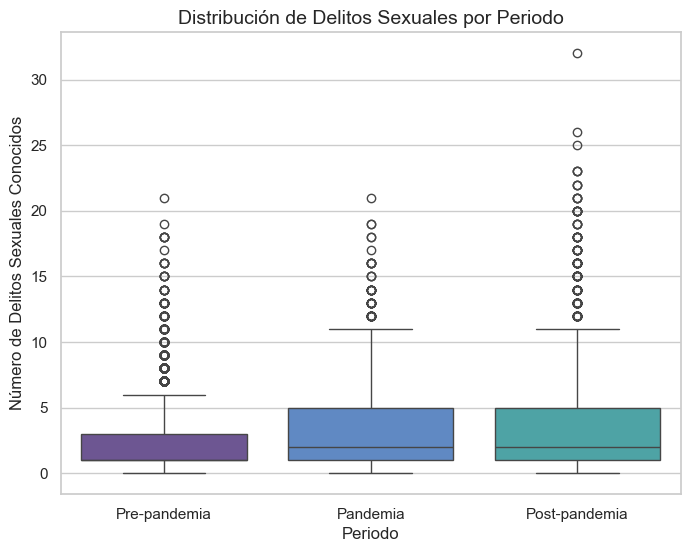

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Colores personalizados
colores_eclosion = [
    '#6A4C9C',  # Morado claro
    '#4F86D4',  # Azul
    '#3FB1B4',  # Verde azulado
    '#FF9F6F',  # Naranja claro
    '#FF6F91',  # Rosa
    '#D24570',  # Rojo intenso
    '#A0365F',  # Rojo oscuro
    '#9C73A6',  # Lavanda
    '#D186B7',  # Rosa claro
    '#F39D80'   # Amarillo/Beige
]

df['Periodo'] = df['Any'].apply(lambda x: 'Pre-pandemia' if x < 2020 else ('Pandemia' if x <= 2021 else 'Post-pandemia'))
delitos_sexuales = df[df['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']
media_delitos = delitos_sexuales.groupby('Periodo')['Coneguts'].mean()

print("Media de delitos sexuales por periodo:")
print(media_delitos)

plt.figure(figsize=(8, 6))
orden_periodos = ['Pre-pandemia', 'Pandemia', 'Post-pandemia']  # Orden deseado de los periodos
sns.boxplot(x='Periodo', y='Coneguts', data=delitos_sexuales, palette=colores_eclosion[:3], order=orden_periodos)
plt.title('Distribución de Delitos Sexuales por Periodo', fontsize=14)
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Número de Delitos Sexuales Conocidos', fontsize=12)
plt.show()


Interpretación: Este gráfico nos muestra cómo han variado los delitos sexuales conocidos en tres periodos: antes de la pandemia, durante la pandemia y después de la pandemia. Cada caja representa la concentración y la variabilidad de los casos mensuales en cada etapa.

Antes de la pandemia:
Los delitos sexuales eran más estables. La caja es pequeña, lo que significa que los casos mensuales variaban poco. La mayoría de los meses tenían valores bajos, alrededor de 2 casos, y apenas había meses excepcionales con cifras mucho más altas (los puntos fuera de la caja, llamados "outliers"). En resumen, los datos eran más "predecibles".

Durante la pandemia:
Aquí vemos una caja más grande, lo que indica que los delitos sexuales fluctuaron mucho más. En algunos meses hubo menos casos, pero en otros se registraron picos. Esta variabilidad podría reflejar el impacto de los confinamientos, la dificultad para denunciar, o cambios en las dinámicas sociales durante ese periodo tan atípico. También aparecen más puntos fuera de la caja, señal de que hubo meses especialmente inusuales.

Después de la pandemia:
Aunque la pandemia terminó, las fluctuaciones continuaron. La caja sigue siendo grande, mostrando que los casos mensuales todavía son irregulares. Los valores atípicos (outliers) persisten, lo que sugiere que los efectos de la pandemia, como tensiones sociales o económicas, pudieron haber dejado su huella en este tipo de delitos.

En conclusión podemos decir que antes de la pandemia, los delitos sexuales eran más constantes mes a mes. Durante y después de la pandemia, hubo más altibajos, con meses de pocos casos y otros de muchos. Esto refleja cómo eventos tan disruptivos como la pandemia pueden afectar incluso la incidencia de delitos, generando cambios que, en este caso, parecen haber perdurado en el tiempo.

3.2.1 Test ANOVA: Annálisis de Varianza
Se trata de una prueba estadística utilizada para comparar las medias de tres o más grupos y determinar si hay diferencias significativas entre ellas. En este caso de los periodos pre-pandemia, pandemia y postpandemia.

In [22]:
from scipy import stats
pre_pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Pre-pandemia']['Coneguts']
pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Pandemia']['Coneguts']
post_pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Post-pandemia']['Coneguts']

# Test ANOVA
f_stat, p_value = stats.f_oneway(pre_pandemia, pandemia, post_pandemia)
print("\nResultado del Test ANOVA:")
print(f"Estadístico F: {f_stat:.2f}", end='\n\n')
if p_value < 0.05:
    print(f"\033[1;32mConclusión: Hay diferencias significativas en el número de delitos sexuales entre los periodos.\033[0m")
else:
    print(f"\033[1;31mConclusión: No se encontraron diferencias significativas en el número de delitos sexuales entre los periodos.\033[0m")

print(f"Valor p: {p_value:.2e}")



Resultado del Test ANOVA:
Estadístico F: 206.80

Conclusión: Hay diferencias significativas en el número de delitos sexuales entre los periodos.
Valor p: 4.46e-89


3.2.2 Test Post-Hoc Tukey

Se utiliza después de realizar un test ANOVA cuando hay un resultado significativo, para realizar comparaciones entre cada par de grupos y ver qué diferencias específicas existen entre ellos.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df['Periodo'] = df['Any'].apply(lambda x: 'Pre-pandemia' if x < 2020 else ('Pandemia' if x <= 2021 else 'Post-pandemia'))
delitos_sexuales = df[df['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']

#Test ANOVA
pre_pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Pre-pandemia']['Coneguts']
pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Pandemia']['Coneguts']
post_pandemia = delitos_sexuales[delitos_sexuales['Periodo'] == 'Post-pandemia']['Coneguts']

f_stat, p_value = stats.f_oneway(pre_pandemia, pandemia, post_pandemia)


print("Resultado del Test ANOVA:")
print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor p: {p_value:.2e}")

if p_value < 0.05:
    print("\nRealizando Test Post-Hoc de Tukey...")
    data = pd.concat([pre_pandemia, pandemia, post_pandemia], axis=0)
    periods = ['Pre-pandemia'] * len(pre_pandemia) + ['Pandemia'] * len(pandemia) + ['Post-pandemia'] * len(post_pandemia)
    
    # test de Tukey
    tukey = pairwise_tukeyhsd(data, periods, alpha=0.05)
    
    # Mostrar los resultados de Tukey
    print("\nResultados del Test Post-Hoc de Tukey:")
    print(tukey.summary())
else:
    print("No hay diferencias significativas entre los periodos, por lo que no realizamos el test Post-Hoc.")


Resultado del Test ANOVA:
Estadístico F: 206.80
Valor p: 4.46e-89

Realizando Test Post-Hoc de Tukey...

Resultados del Test Post-Hoc de Tukey:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
     Pandemia Post-pandemia   0.3922   0.0  0.1844     0.6   True
     Pandemia  Pre-pandemia  -0.8517   0.0 -1.0289 -0.6745   True
Post-pandemia  Pre-pandemia  -1.2439   0.0 -1.3976 -1.0903   True
-----------------------------------------------------------------


Interpretación:
Estamos comparando la cantidad de delitos sexuales conocidos en tres momentos diferentes: antes de la pandemia (pre-pandemia), durante la pandemia y después de la pandemia (post-pandemia). Lo que hicimos fue un análisis estadístico para ver si hay alguna diferencia significativa entre estos tres periodos.

Primero, el test ANOVA nos dijo que sí, hay diferencias importantes entre los tres periodos. Esto significa que el número de delitos sexuales conocidos no se comporta de la misma forma en cada uno de estos tiempos.

Después, con el test de Tukey, que es un análisis más detallado, descubrimos que las diferencias no solo existen en general, sino que son claras entre grupos específicos:

-Entre pandemia y post-pandemia, encontramos que la diferencia es pequeña pero significativa. El número de delitos sexuales conocidos durante la pandemia es ligeramente mayor que después de la pandemia.

-Entre pandemia y pre-pandemia es aún más grande. Esto sugiere que el número de delitos sexuales conocidos en la pandemia fue considerablemente menor que antes.

-Entre post-pandemia y pre-pandemia muestran la mayor diferencia, con un descenso notable en los delitos conocidos después de la pandemia comparado con el periodo previo.

En resumen, estos resultados nos dicen que la pandemia parece haber tenido un impacto en el número de delitos sexuales conocidos. El número fue más bajo durante la pandemia y siguió siendo bajo después de ella en comparación con antes de la pandemia.

 # 3.3 Gráfico 4: Total de Delitos Conocidos por Provincia en Cataluña (2019-2021)

Este gráfico presenta la evolución de los delitos conocidos en Cataluña entre los años 2019 y 2023, segmentado por provincia. En cada subgráfico, cada barra representa el número total de delitos conocidos en una provincia específica durante ese año. Al observar las barras, podemos comparar fácilmente las provincias que tienen un mayor número de delitos conocidos y cómo estos varían a lo largo del tiempo. Las cifras exactas sobre las barras permiten una comparación precisa. De esta manera, podemos identificar patrones de aumento o disminución en los delitos a lo largo de los años.

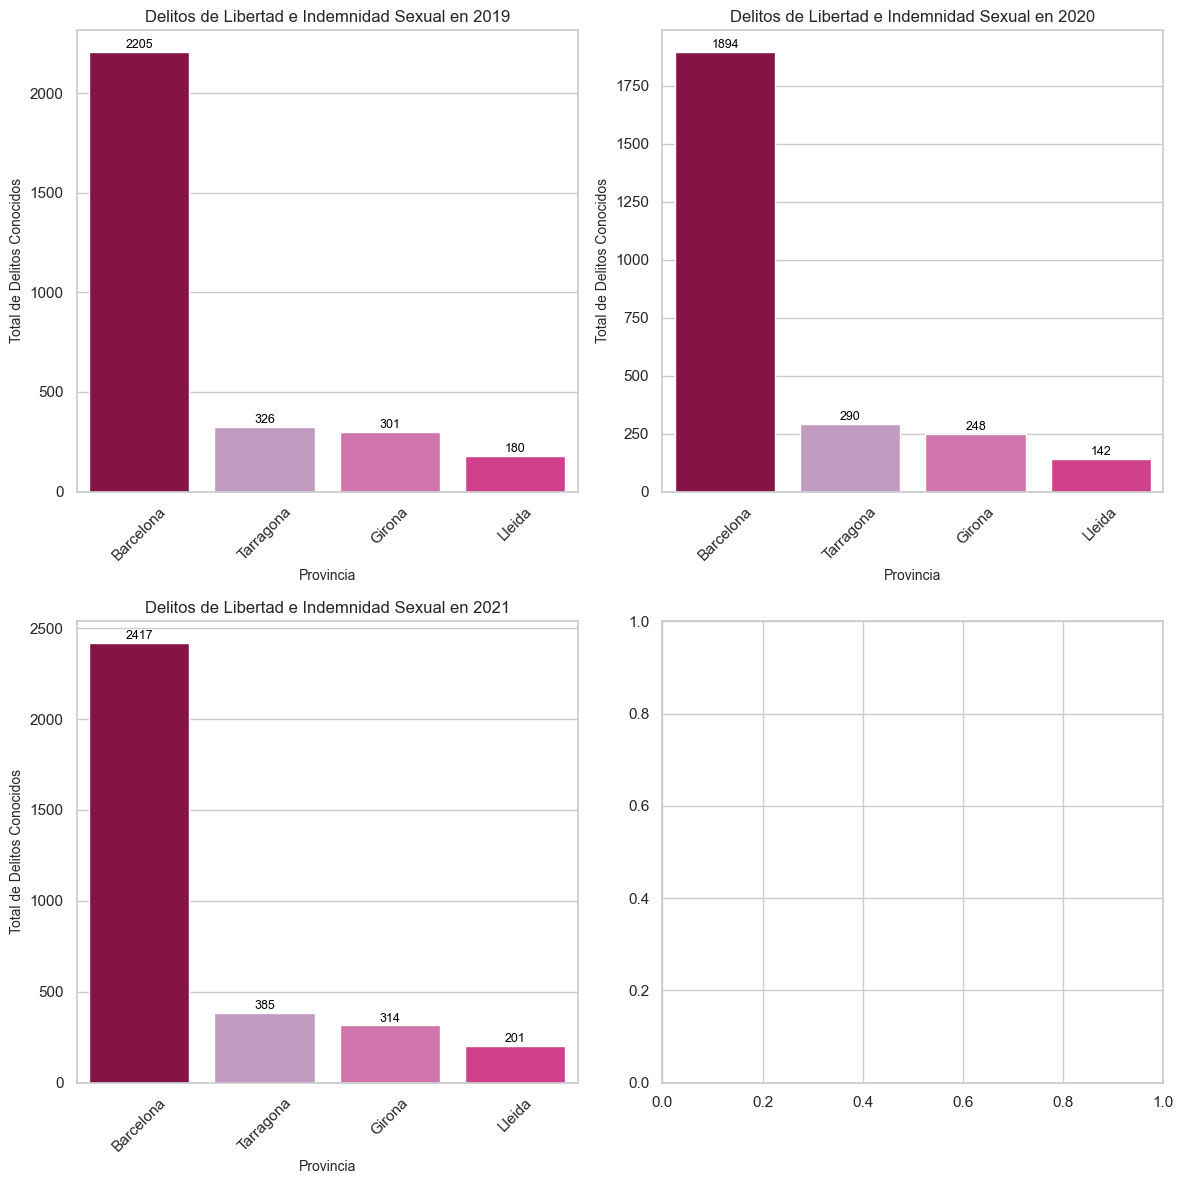

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors_lilac = ['#980043', '#c994c7', '#df65b0', '#e7298a', '#ce1256', '#67001f']
filtro_delitos = df[
    (df['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals') & 
    (df['Any'].isin([2019, 2020, 2021]))  
]

fig, axes = plt.subplots(2, 2, figsize=(12, 12)) 

for i, año in enumerate([2019, 2020, 2021]):  
    row = i // 2  
    col = i % 2   
    data_year = filtro_delitos[filtro_delitos['Any'] == año]
    delitos_por_provincia = data_year.groupby('Provincia')['Coneguts'].sum().reset_index()
    delitos_por_provincia = delitos_por_provincia.sort_values('Coneguts', ascending=False)

    sns.barplot(
        ax=axes[row, col], 
        data=delitos_por_provincia, 
        x='Provincia', 
        y='Coneguts', 
        palette=custom_colors_lilac[:len(delitos_por_provincia)]  
    )
    axes[row, col].set_title(f'Delitos de Libertad e Indemnidad Sexual en {año}', fontsize=12)
    axes[row, col].set_xlabel('Provincia', fontsize=10)
    axes[row, col].set_ylabel('Total de Delitos Conocidos', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45)
    
   
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='center', 
                                fontsize=9, color='black', 
                                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Interpretación: Aunque a primera vista las cifras del total de delitos conocidos parecen no variar significativamente, un análisis más detallado revela diferencias notables al comparar por años y provincias. Se observa una caída pronunciada en las cifras de 2020, seguida de una recuperación en 2021, donde todas las provincias superan los niveles de 2019 sin excepción.

En el caso de la provincia de Barcelona, el total de delitos conocidos en 2019 fue de 2,417, mientras que en 2020 disminuyó drásticamente a 1,894. Sin embargo, para 2021, las cifras se recuperan y alcanzan nuevamente los 2,417 casos. Además, existe una diferencia sustancial entre las cifras de Barcelona y las de las demás provincias. Por orden, le siguen Tarragona, Girona y Lleida, con cifras notablemente menores con un baremo de entre 140 y 390 casos de delitos conocidos.

# 3.4 Gráfico 5: Evolución de los Delitos Sexuales Conocidos en Cataluña (2019-2021)
Tipo de gráfico: Gráfico de líneas

Este gráfico muestra la evolución de los delitos sexuales conocidos durante estos años. De este modo, podemos ver si ha habido un aumento o disminución a lo largo del tiempo.

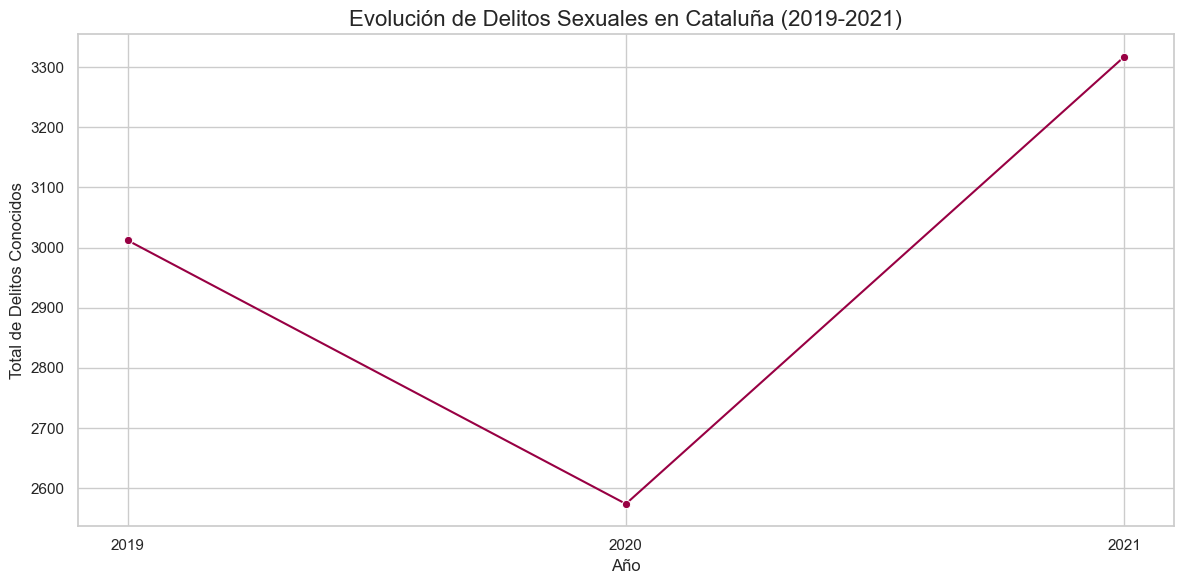

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors_lilac = ['#980043', '#c994c7', '#df65b0', '#e7298a', '#ce1256', '#67001f']
filtro_años = df[df['Any'].isin([2019, 2020, 2021])]
delitos_sexuales = filtro_años[filtro_años['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']
delitos_sexuales_evolucion = delitos_sexuales.groupby('Any')['Coneguts'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=delitos_sexuales_evolucion, x='Any', y='Coneguts', marker='o', color=custom_colors_lilac[0])  
plt.title('Evolución de Delitos Sexuales en Cataluña (2019-2021)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos Conocidos', fontsize=12)
plt.xticks(ticks=[2019, 2020, 2021], labels=['2019', '2020', '2021'])
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretación: En el eje X se representan los años de 2019 a 2021, y en el eje Y, el total de delitos conocidos. En 2019, se registraron aproximadamente 3,000 delitos conocidos. Sin embargo, en 2020 las cifras disminuyen notablemente a menos de 2,600. Para 2021, se observa una recuperación significativa, alcanzando más de 3,300 casos conocidos, superando así los niveles registrados en el periodo prepandemia.

# 3.5 Gráfico 6: Distribución de los Delitos Sexuales por Tipo (2019-2021)
Tipo de gráfico: Gráfico de barras apiladas

Este gráfico muestra los diferentes tipos de delitos sexuales (agresión sexual, acoso, abuso) a lo largo de los años, ofreciendo un desglose más detallado de la categoría.

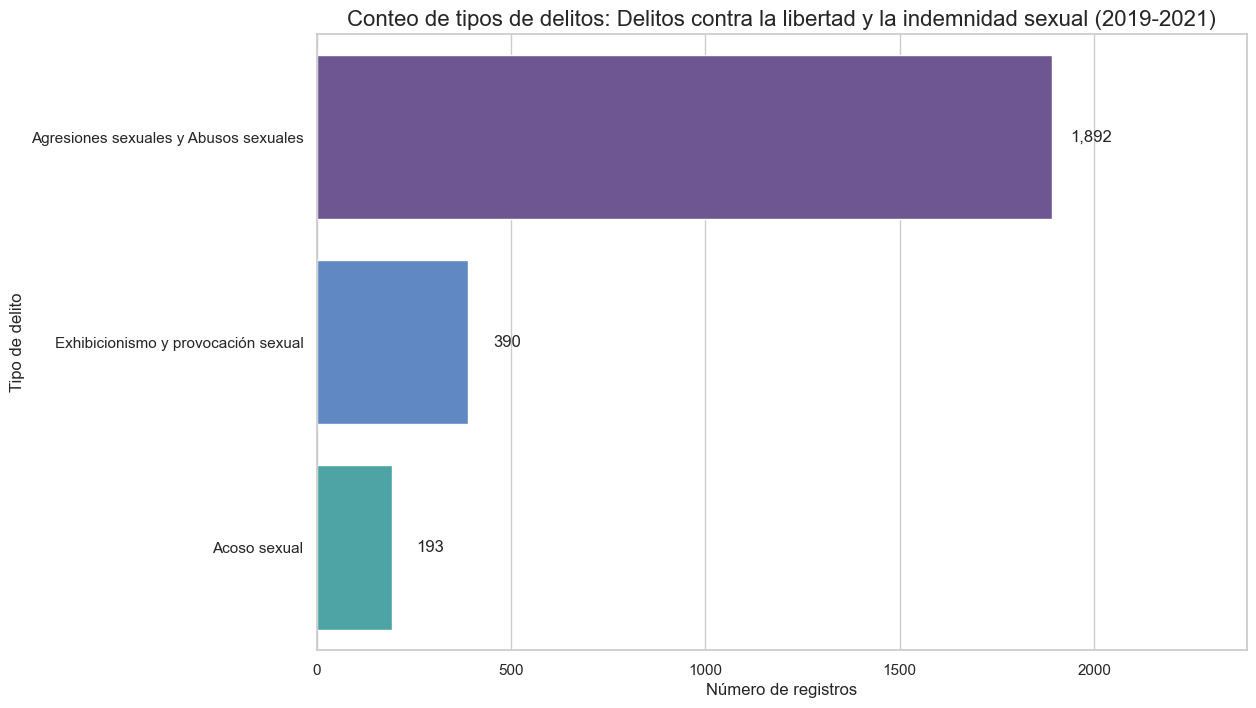

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtrado = df[df['Any'].between(2019, 2021)]
delictes_contra_la_llibertat_sexual = df_filtrado[df_filtrado['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']
conteo_tipus_de_fet = delictes_contra_la_llibertat_sexual['Tipus de fet'].value_counts()

traduccion = {
    'Agressions sexuals i Abusos sexuals': 'Agresiones sexuales y Abusos sexuales',
    'Assetjament sexual': 'Acoso sexual',
    'Exhibicionisme i provocació sexual': 'Exhibicionismo y provocación sexual',
    'Contra la llibertat sexual': 'Contra la libertad sexual',
    'Resta delictes sexuals': 'Otros delitos sexuales'
}

conteo_tipus_de_fet.index = conteo_tipus_de_fet.index.map(traduccion)

colores_eclosion = [
    '#6A4C9C',  
    '#4F86D4',  
    '#3FB1B4',  
    '#FF9F6F',  
    '#FF6F91',  
    '#D24570',  
    '#A0365F',  
    '#9C73A6',  
    '#D186B7',  
    '#F39D80'   
]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=conteo_tipus_de_fet.values, y=conteo_tipus_de_fet.index, palette=colores_eclosion[:len(conteo_tipus_de_fet)])

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',  
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),  
                ha='center', va='center', fontsize=12)


plt.xlim(0, conteo_tipus_de_fet.values.max() + 500)

plt.title('Conteo de tipos de delitos: Delitos contra la libertad y la indemnidad sexual (2019-2021)', fontsize=16)
plt.xlabel('Número de registros', fontsize=12)
plt.ylabel('Tipo de delito', fontsize=12)
plt.show()


Interpetación: Entre los años 2019 y 2021, las categorías de delitos sexuales más frecuentes fueron, en orden descendente: las agresiones sexuales y abusos, que incluyen violaciones, con un total de 1892 registros. A continuación, se encuentran los delitos de exhibicionismo y provocación sexual, con 390 registros, seguidos por los casos de acoso sexual, con 193 registros. Concluimos que prevalecen los delitos más graves como la agresión y abuso sexual.

Se observa que, dentro del equipo de Mossos d'Esquadra, ha habido variaciones en la clasificación de los registros a lo largo de los años. Si nos centramos en los delitos contra la libertad sexual, vemos que apenas hay registros en 2011, mientras que la categoría 'Otros Delitos Sexuales' no presenta datos hasta 2022. Esto sugiere que, en años anteriores, este tipo de delitos se clasificaron de manera diferente. A continuación, se presenta una tabla con los datos para una mejor visualización.

In [27]:

df_filtrado = df[df['Any'].between(2011, 2024)]
delictes_contra_la_llibertat_sexual = df_filtrado[df_filtrado['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']
delictes_contra_la_llibertat_sexual['Casos registrats'] = 1
tabla_resultado = delictes_contra_la_llibertat_sexual.groupby(['Any', 'Tipus de fet'])['Casos registrats'].sum().unstack(fill_value=0)
print(tabla_resultado)


Tipus de fet  Agressions sexuals i Abusos sexuals  Assetjament sexual  \
Any                                                                     
2011                                          561                  30   
2012                                          531                  37   
2013                                          536                  32   
2014                                          552                  35   
2015                                          549                  32   
2016                                          576                  40   
2017                                          587                  27   
2018                                          609                  35   
2019                                          633                  67   
2020                                          613                  59   
2021                                          646                  67   
2022                                          648  

Distribución de los valores: Si observas, los delitos de tipo "Agressions sexuals i Abusos sexuals" en los años 2019, 2020 y 2021 tienen cifras relativamente altas, por ejemplo:

2019: 633 (Agressions sexuals i Abusos sexuals), 67 (Assetjament sexual)
2020: 613, 59
2021: 646, 67 Pero otras categorías, como "Contra la llibertat sexual", muestran valores cercanos a 0.
¿Por qué el eje Y es tan bajo?

Concentración en valores pequeños: El hecho de que el eje Y vaya de 0 a 30 puede indicar que la mayoría de las categorías de delitos sexuales en ese periodo tienen una baja frecuencia en comparación con las agresiones sexuales. Esto podría estar provocando que el gráfico no necesite un rango mayor para mostrar el comportamiento de la mayoría de las categorías.
Pocas categorías con valores muy altos: Si solo unas pocas categorías tienen valores elevados (como "Agressions sexuals i Abusos sexuals"), pero otras tienen valores bajos o nulos, el eje Y se ajusta a ese patrón y no muestra un rango muy alto.

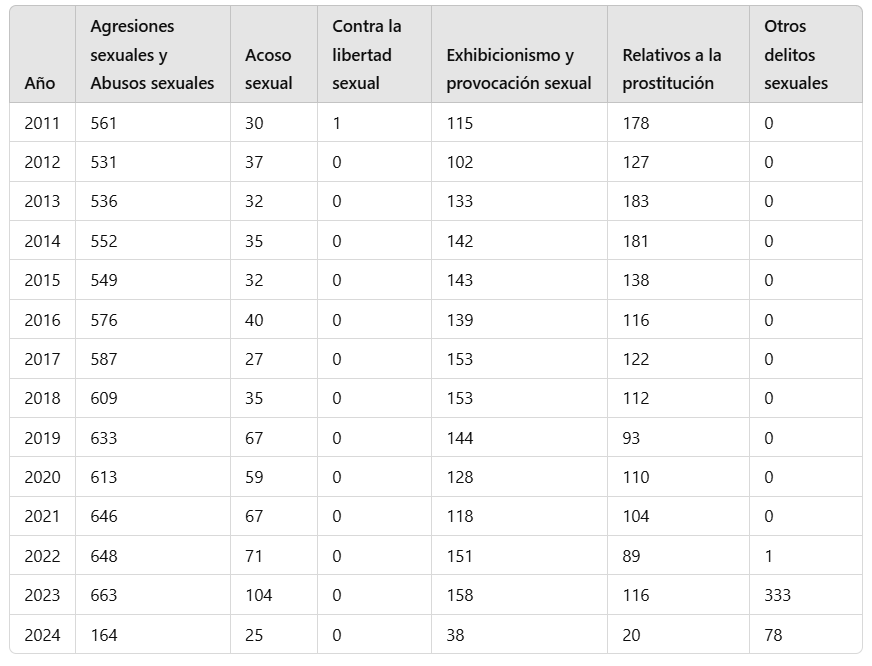

In [28]:
from IPython.display import Image, display
ruta = r"C:\Users\crist\Downloads\delito_sexual.png"
display(Image(filename=ruta))

# 3.6  Gráfico 7: Evolución de los Delitos Sexuales en Barcelona y Girona (2019-2021)
Tipo de gráfico: Gráfico de líneas

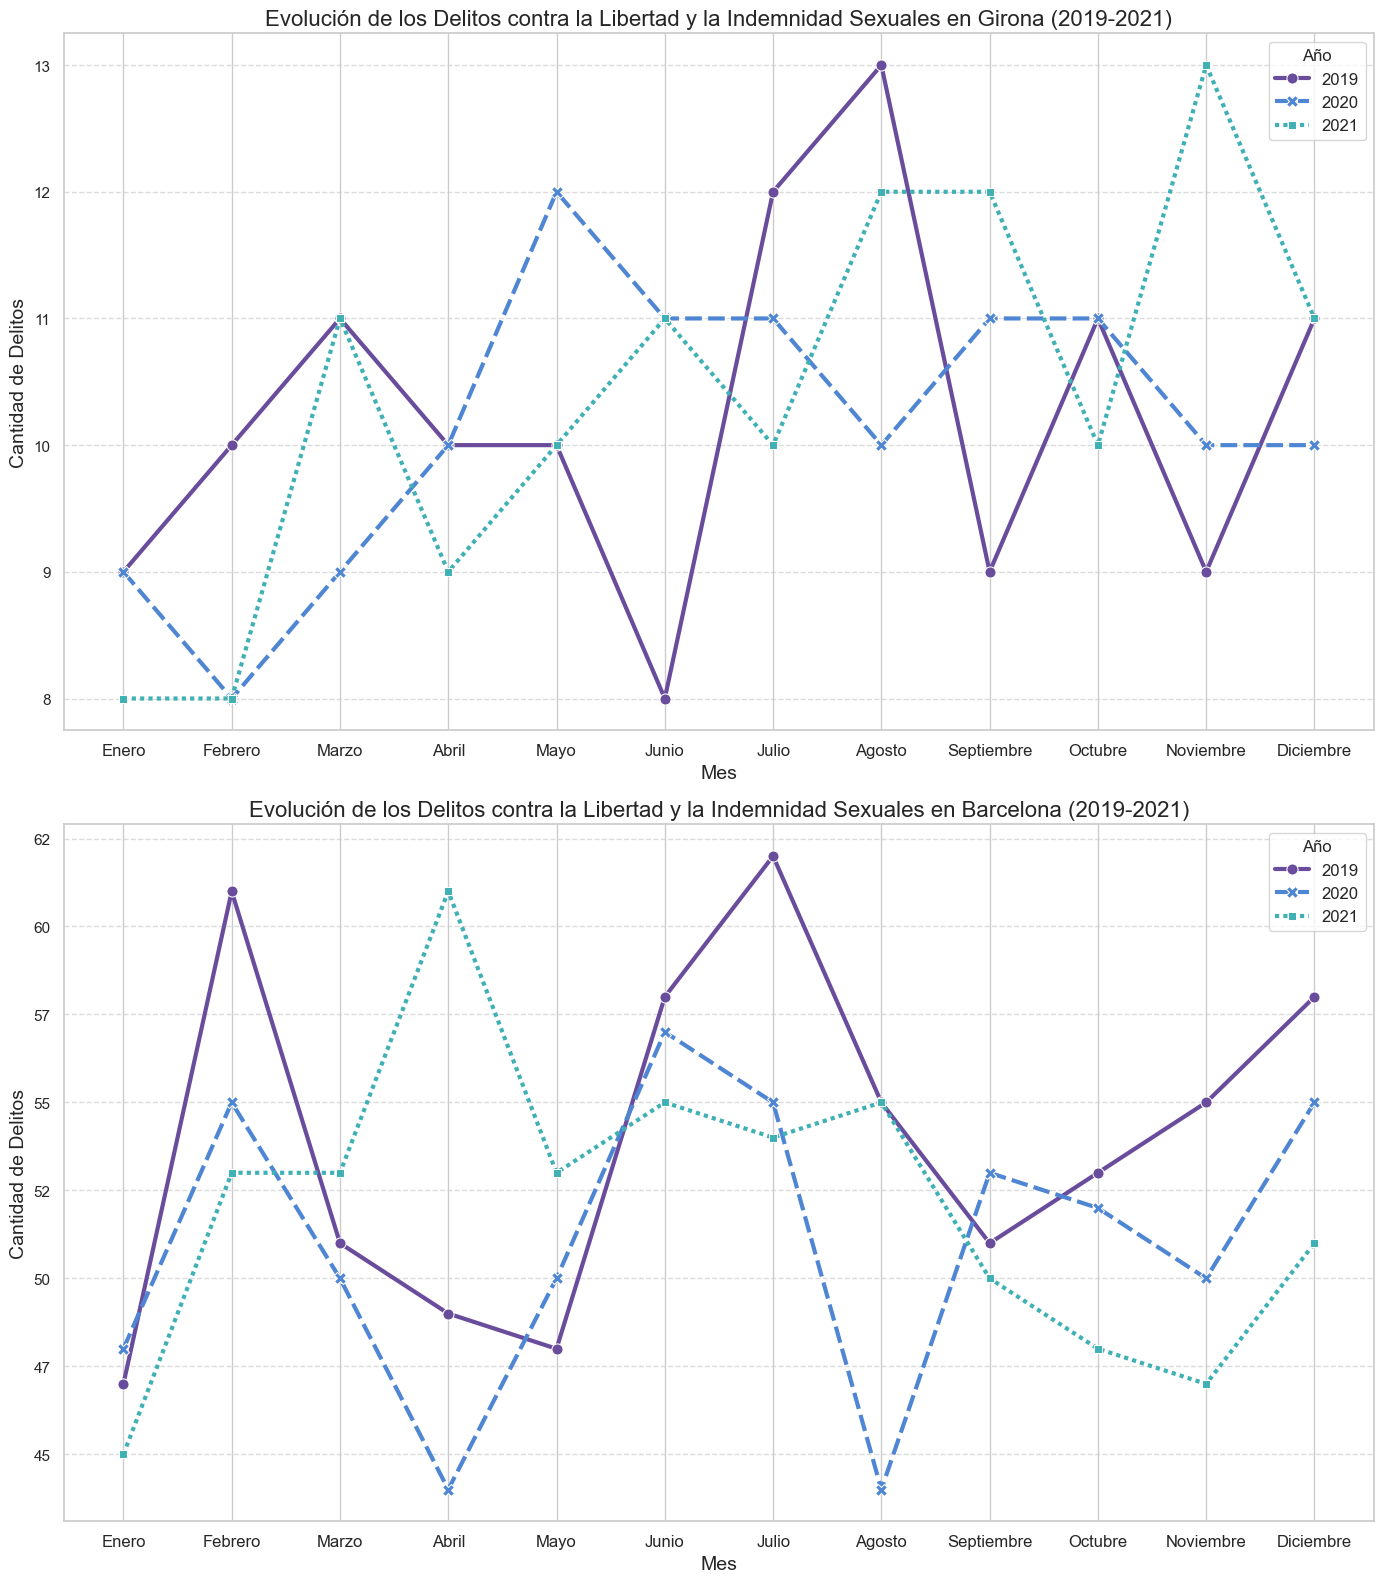

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
filtro_años = df[
    (df['Any'].between(2019, 2021)) & 
    (df['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals')
]
filtro_años['Provincia'] = filtro_años['Regió Policial (RP)'].map(mapeo_provincias)
filtro_girona = filtro_años[filtro_años['Provincia'] == 'Girona']
filtro_barcelona = filtro_años[filtro_años['Provincia'] == 'Barcelona']
conteo_girona = filtro_girona.groupby(['Mes', 'Provincia', 'Any']).size().reset_index(name='quantitat')
conteo_barcelona = filtro_barcelona.groupby(['Mes', 'Provincia', 'Any']).size().reset_index(name='quantitat')

colores_eclosion = [
    '#6A4C9C',  
    '#4F86D4',  
    '#3FB1B4',  
    '#FF9F6F',  
    '#FF6F91', 
    '#D24570',  
    '#A0365F',  
    '#9C73A6',  
    '#D186B7',  
    '#F39D80'   
]

fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Girona
sns.lineplot(
    data=conteo_girona,
    x='Mes',
    y='quantitat',
    hue='Any',
    style='Any',
    markers=True,
    palette=colores_eclosion[:len(conteo_girona['Any'].unique())],  # Asignar los colores de la paleta
    linewidth=3,
    markersize=8,
    ax=axes[0]
)
axes[0].set_title('Evolución de los Delitos contra la Libertad y la Indemnidad Sexuales en Girona (2019-2021)', fontsize=16)
axes[0].set_xlabel('Mes', fontsize=14)
axes[0].set_ylabel('Cantidad de Delitos', fontsize=14)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], fontsize=12)
axes[0].legend(title='Año', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Barcelona
sns.lineplot(
    data=conteo_barcelona,
    x='Mes',
    y='quantitat',
    hue='Any',
    style='Any',
    markers=True,
    palette=colores_eclosion[:len(conteo_barcelona['Any'].unique())], 
    linewidth=3,
    markersize=8,
    ax=axes[1]
)
axes[1].set_title('Evolución de los Delitos contra la Libertad y la Indemnidad Sexuales en Barcelona (2019-2021)', fontsize=16)
axes[1].set_xlabel('Mes', fontsize=14)
axes[1].set_ylabel('Cantidad de Delitos', fontsize=14)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], fontsize=12)
axes[1].legend(title='Año', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()


Interpretación:

En Girona, los delitos contra la libertad y la indemnidad sexuales presentan una tendencia marcada por subidas y bajadas significativas a lo largo de los años analizados. En 2019, destaca el mes de agosto como el momento con más casos reportados, coincidiendo posiblemente con el incremento de actividades sociales durante el verano. En 2020, el número de delitos parece más uniforme, aunque se observan repuntes en mayo, julio y octubre. Esto podría estar relacionado con el impacto de las restricciones por el COVID-19, que limitaron la movilidad y las interacciones sociales durante algunos meses. Por último, en 2021, hay una mayor variabilidad, con picos importantes en marzo, agosto y noviembre, lo que refleja un retorno a dinámicas más fluctuantes.

Barcelona muestra cifras significativamente más altas que Girona, acorde con su mayor población y densidad urbana. En 2019, los meses de febrero y julio destacan con las cifras más altas del periodo, reflejando una posible relación con eventos o actividades de gran afluencia. El año 2020, marcado por la pandemia, evidencia una disminución en los meses de abril y mayo, coincidiendo con las restricciones más estrictas del confinamiento. En 2021, se observa una recuperación gradual en el número de delitos, con un crecimiento notable en diciembre, lo que podría estar asociado al aumento de interacciones sociales durante las festividades de fin de año.

Ambas regiones reflejan patrones similares en la evolución de los delitos, especialmente la caída notable durante los meses más duros del confinamiento en 2020. Sin embargo, las diferencias entre las dos son evidentes: Barcelona, como núcleo urbano más grande, concentra una cantidad mucho mayor de delitos y muestra una estacionalidad más marcada. Por otro lado, Girona, aunque con cifras más bajas, presenta variaciones más pronunciadas entre los meses. Esto sugiere que las dinámicas de la criminalidad están influenciadas tanto por factores geográficos como por el contexto social y económico de cada región.

En resumen, mientras que en ambas zonas el COVID-19 parece haber reducido temporalmente los casos, los delitos volvieron a repuntar en 2021, destacando la importancia de analizar cómo las dinámicas sociales y las circunstancias extraordinarias, como la pandemia, afectan la criminalidad.

confinamiento: 14 de marzo de 2020: Se declara el estado de alarma, comenzando el confinamiento domiciliario estricto. Solo se permitía salir para actividades esenciales como comprar alimentos, medicamentos o trabajar en sectores esenciales.

Abril de 2020: Continúa el confinamiento estricto durante todo el mes. Este fue el periodo de mayor impacto en la movilidad y actividad social.

Mayo de 2020: Empieza la desescalada por fases:

Fase 0 (principios de mayo): Algunas actividades limitadas como paseos y ejercicio al aire libre en horarios restringidos.
Fase 1 (a partir de mediados de mayo, según las regiones): Se permite la apertura limitada de comercios y terrazas, además de reuniones sociales pequeñas.
21 de junio de 2020: Finaliza el estado de alarma, entrando en la "nueva normalidad".

# 3.7 Gráfico 8: Mapa de Calor de puntos sobre los Delitos Sexuales de 2019 a 2021 en Barcelona y Girona


Además de observar la evolución temporal de los delitos sexuales, es fundamental analizar su distribución geográfica. Un mapa de calor nos ayudará a visualizar las áreas con mayor concentración de delitos sexuales en las provincias de Barcelona y Girona.

In [30]:
import folium
import pandas as pd
import branca

# Filtrar los datos para delitos sexuales y los años de 2019 a 2021
delictes_sexuals = df[df['Títol Codi Penal'] == 'Delictes contra la llibertat i la indemnitat sexuals']
delictes_sexuals_2019_2021 = delictes_sexuals[delictes_sexuals['Any'].between(2019, 2021)]

# Filtrar por provincias de Girona y Barcelona
delictes_sexuals_girona_barcelona = delictes_sexuals_2019_2021[delictes_sexuals_2019_2021['Provincia'].isin(['Girona', 'Barcelona'])]

# Agrupar los datos por latitud, longitud y contar los delitos en cada ubicación
delitos_por_ubicacion = delictes_sexuals_girona_barcelona.groupby(['Latitud', 'Longitud']).size().reset_index(name='Conteo')

# Crear el mapa base centrado en Cataluña
mapa = folium.Map(location=[41.9028, 1.8123], zoom_start=9)

# Definir una nueva paleta de colores (rojo a verde)
colormap = branca.colormap.LinearColormap(
    colors=['#FFFF00', '#FFA500', '#FF0000'],  # Amarillo a Naranja a Rojo
    vmin=delitos_por_ubicacion['Conteo'].min(),
    vmax=delitos_por_ubicacion['Conteo'].max()
)

# Añadir puntos de delitos sexuales con tamaño y color variable según el volumen
for _, row in delitos_por_ubicacion.iterrows():
    # Calcular el tamaño del círculo de forma proporcional
    radius = row['Conteo'] * 0.3  # Ajusta este valor para reducir aún más el tamaño

    # Asignar un color en función de la cantidad de delitos
    color = colormap(row['Conteo'])

    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=radius,  # Tamaño proporcional a la cantidad de delitos
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Delitos: {row['Conteo']}<br>Latitud: {row['Latitud']}<br>Longitud: {row['Longitud']}",
    ).add_to(mapa)

# Añadir la escala de colores al mapa
colormap.add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save("delitos_sexuales_volumen_2019_2021_girona_barcelona_mejorado.html")

# Mostrar la ubicación del archivo generado
print("El mapa interactivo se ha guardado como 'delitos_sexuales_volumen_2019_2021_girona_barcelona_mejorado.html'.")


El mapa interactivo se ha guardado como 'delitos_sexuales_volumen_2019_2021_girona_barcelona_mejorado.html'.


# 4. Creación de Dashboard en PBI

En primer lugar, realizamos la conexión para cargar nuestro dataset en Python a PBI.

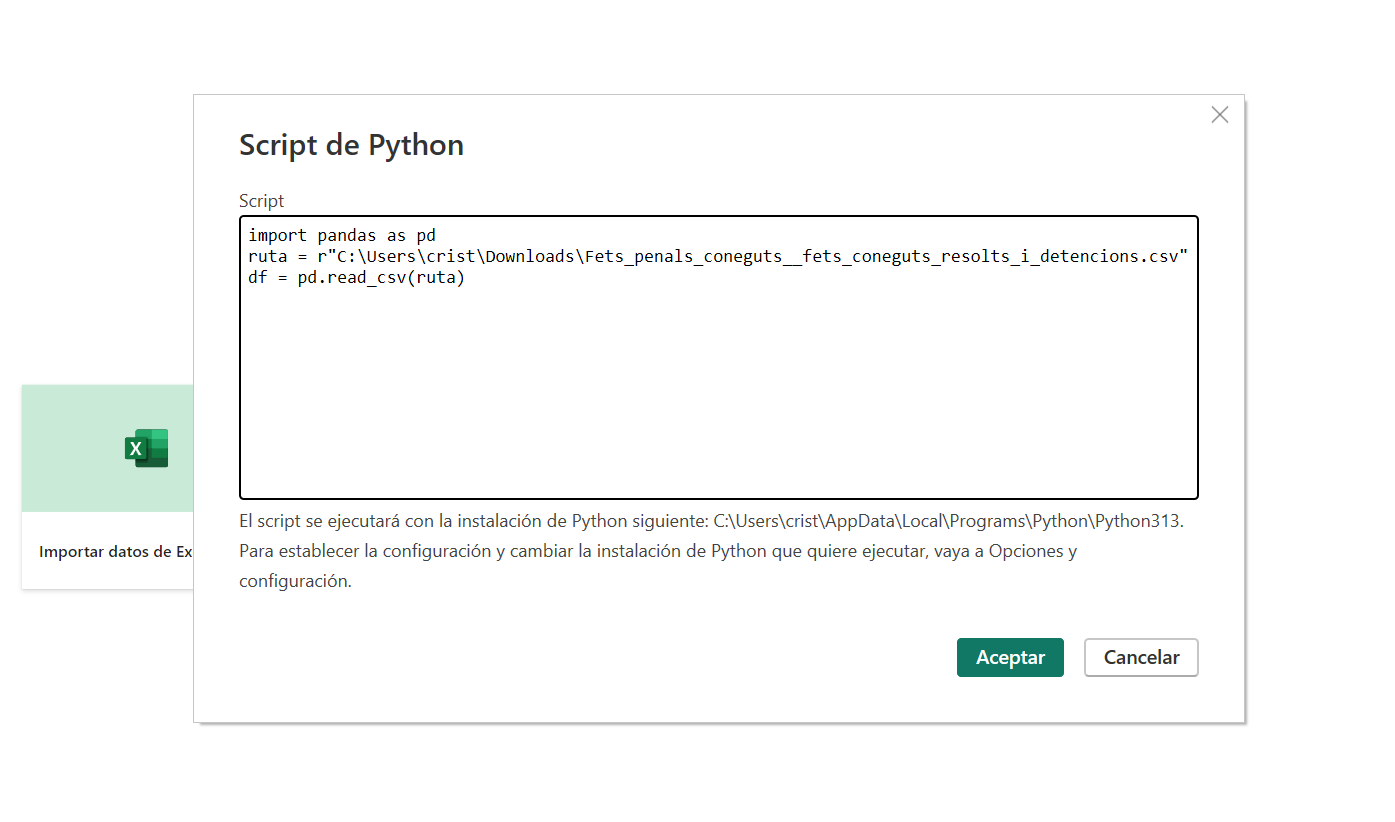

In [31]:
from IPython.display import Image, display
ruta = r"C:\Users\crist\Downloads\script.png"
display(Image(filename=ruta))

En segundo lugar, comenzamos a crear nuestro dashboard:

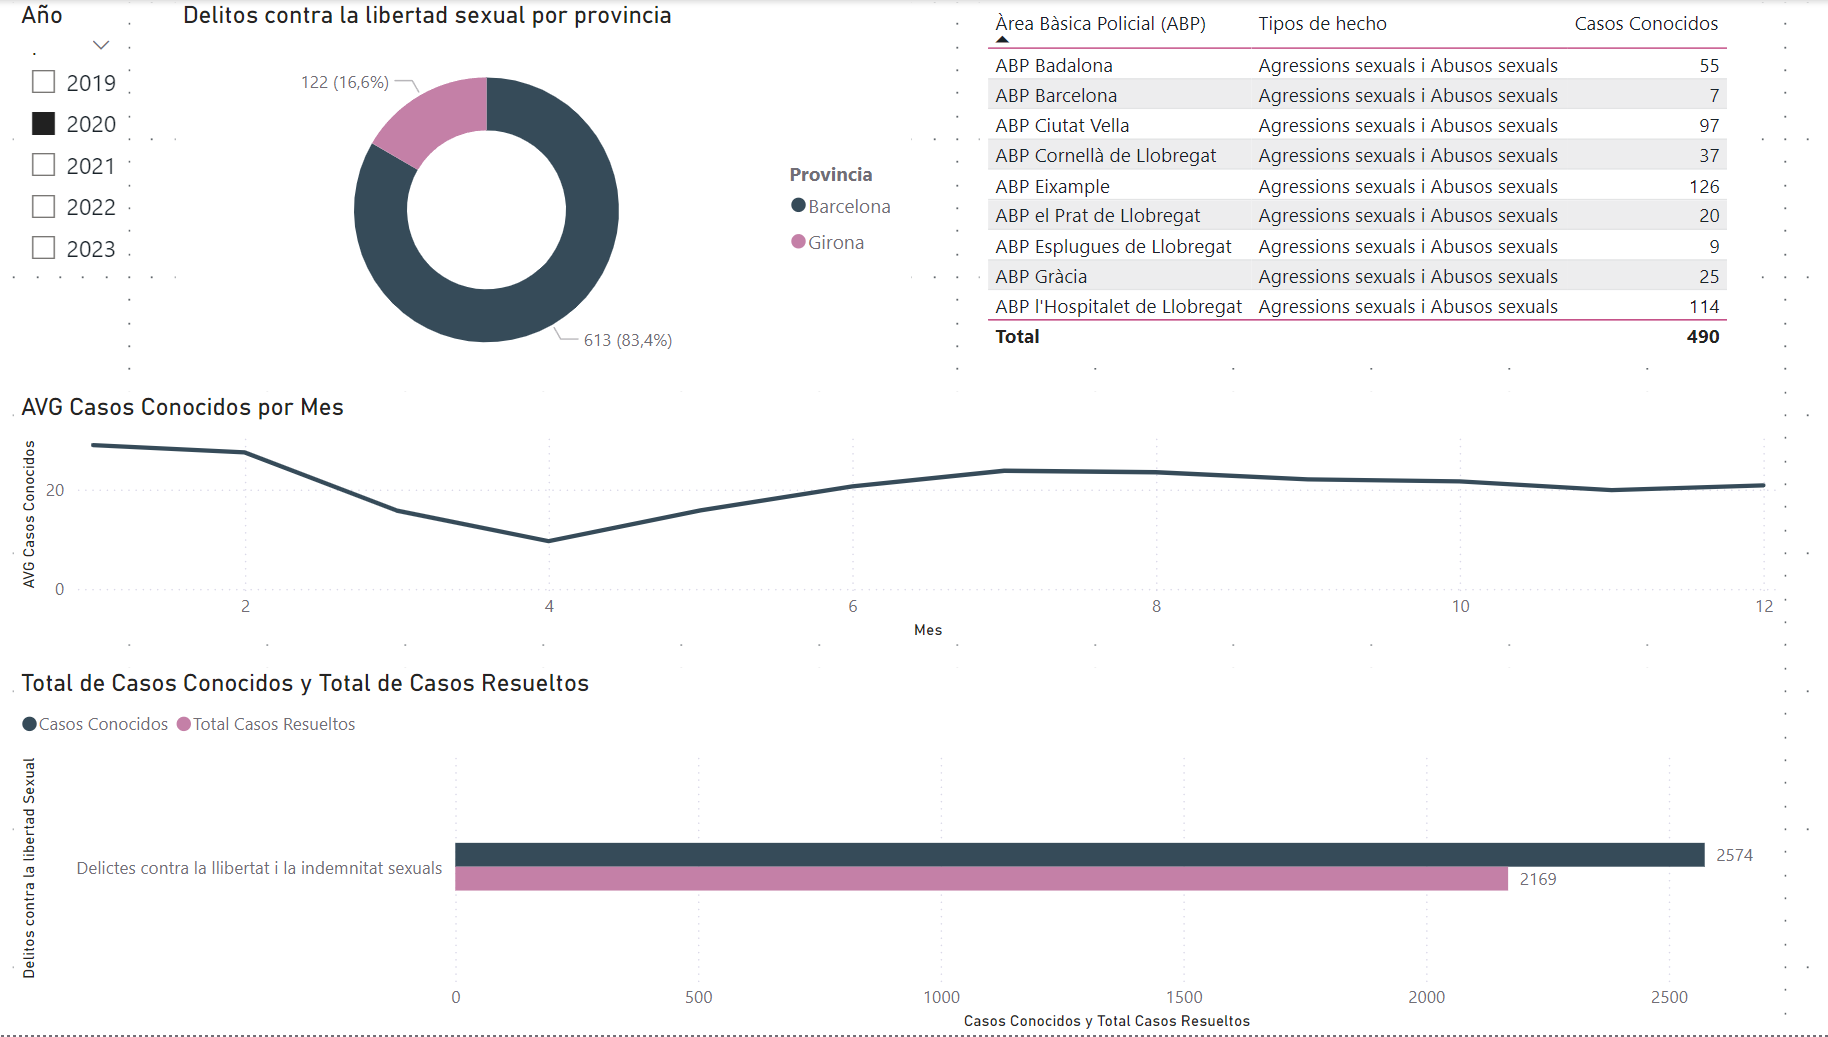

In [32]:
from IPython.display import Image, display
ruta = r"C:\Users\crist\Downloads\dashboard.png"
display(Image(filename=ruta))

Interpretación:

En la parte superior izquierda, se ha añadido un control de selección de años, lo que permite interactuar con las visualizaciones y ajustar los datos según el periodo deseado.

En la parte superior, se presenta un gráfico de anillos que muestra la distribución de los delitos contra la libertad sexual por provincia. Este gráfico está filtrado para mostrar únicamente los datos correspondientes a las provincias de Girona y Barcelona.

En la esquina superior derecha, se pueden visualizar algunas áreas policiales pertenecientes a la provincia de Barcelona, junto con los datos de delitos conocidos relacionados con agresiones y abusos sexuales.

Para el gráfico de "Promedio de Casos Conocidos por Mes", se ha utilizado un gráfico de líneas. En el eje X se representan los meses (mostrados como números), mientras que en el eje Y se muestra el promedio de los delitos conocidos, calculado con la siguiente fórmula DAX: Media Casos Conocidos = AVERAGE('df'[Coneguts]).

En la parte inferior, se encuentra un gráfico de barras agrupadas. En el eje X se comparan los casos conocidos y los casos resueltos, y en el eje Y se agrupan los delitos contra la libertad sexual, proporcionando una visión comparativa de la resolución de los casos.

# 5. Conclusiones: Reflexiones Finales sobre la Criminalidad y Delitos Sexuales en Cataluña
Este análisis ha permitido observar la evolución de los delitos sexuales en Cataluña, con un enfoque particular en las provincias de Barcelona y Girona. A través de gráficos de evolución temporal, distribución geográfica y comparaciones entre provincias, se ha logrado entender mejor cómo los delitos sexuales han variado en el contexto de la pandemia y a lo largo de los últimos años. Los resultados sugieren que ciertas áreas siguen siendo más propensas a estos delitos, lo que podría orientar las políticas públicas de seguridad.

Hipótesis Principal:
A partir de los datos analizados, podemos concluir que ha habido un aumento de la criminalidad en Cataluña en los últimos 5 años, especialmente en delitos sexuales. Sin embargo, este aumento no es homogéneo y está influenciado por factores como el contexto urbano y el impacto de la pandemia.

Hipótesis Secundaria:
El impacto del COVID-19 en los delitos sexuales ha sido significativo, con una disminución durante los primeros meses del confinamiento y un repunte posterior. Estos hallazgos sugieren que la pandemia tuvo un efecto disruptivo en los patrones de criminalidad, pero no necesariamente redujo la cantidad de delitos sexuales.